In [46]:
import numpy as np # numerical computations
import matplotlib.pyplot as plt # plotting
import pandas as pd # for working with data sets
import os
from scipy.stats import gaussian_kde, ttest_ind, t

import pathlib
pathlib.Path().resolve()

# plot within notebook, useful for later sharing
%matplotlib inline

In [47]:
os.getcwd()

'c:\\Users\\nikib\\Downloads\\bn research project\\BN repository\\BN-research-project\\data'

In [48]:
os.chdir('c:\\Users\\nikib\\Downloads\\bn research project\\BN repository\\BN-research-project\\data') # change the string here to match the path from your computer

In [49]:
data = pd.read_csv("clean_jesse_data.csv", sep=",", header = 0)
data

,Video Name,Sex,Sleep,Cycle,Index
0,Nol A20 Test 110324,Female,NSD,proestrus,0.384828
1,Nol A2l Test 090324,Female,NSD,proestrus,0.311306
2,Nol C20 Test 270324,Female,NSD,proestrus,0.303704
3,Nol C2r Test 270324,Female,NSD,estrus,0.735849
4,Nol D1r Test 110324,Female,NSD,proestrus,0.553672
5,Nol D1rl Test 270324,Female,NSD,estrus,0.049475
6,Nol D20 Test 120324,Female,NSD,estrus,0.306604
7,Nol D2l Test 120324,Female,NSD,estrus,0.368421
8,Nol E1l Test 100424,Female,NSD,estrus,0.000000
9,Nol E1rl Test 100424,Female,NSD,proestrus,0.923774


In [50]:
data.columns # view the column names of the data frame

Index(['Video Name', 'Sex', 'Sleep', 'Cycle', 'Index'], dtype='object')

In [51]:
# Define SE function
def standard_error(x):
    return x.std() / np.sqrt(len(x))

In [53]:
# Perform all aggregations in ONE step
aggregated_measures = data.groupby(['Sex', 'Cycle']).agg(
    mean=('Index', 'mean'),
    sd=('Index', lambda x: x.std(ddof=1) if len(x) > 1 else np.nan),
    se=('Index', lambda x: standard_error(x) if len(x) > 1 else np.nan),
    median=('Index', 'median'),
    q1=('Index', lambda x: x.quantile(0.25)),
    q3=('Index', lambda x: x.quantile(0.75)),
    iqr=('Index', lambda x: x.quantile(0.75) - x.quantile(0.25)),
).reset_index()
female_group = aggregated_measures[aggregated_measures['Sex'] == 'Female']

aggregated_measures

,Sex,Cycle,mean,sd,se,median,q1,q3,iqr
0,Female,estrus,0.292070,0.294592,0.131746,0.306604,0.049475,0.368421,0.318946
1,Female,proestrus,0.543465,0.260349,0.106287,0.469250,0.329686,0.726047,0.396361
2,Male,.,0.514168,0.314202,0.094735,0.479290,0.298424,0.778306,0.479881


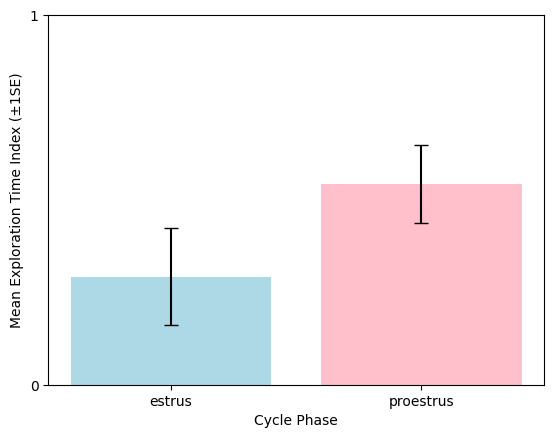

In [54]:
from matplotlib.ticker import MaxNLocator
# Bar plot for mean number of physical acts per group
x = np.arange(len(female_group))
colors = ['lightblue', 'pink']  # Colors for bars

plt.bar(
    x,
    female_group['mean'],
    color=colors,
    yerr=female_group['se'],  # Error bars for ±1SE
    capsize=5
)
plt.xticks(x, female_group['Cycle'])
plt.ylim(0, 1)
plt.xlabel("Cycle Phase")
plt.ylabel("Mean Exploration Time Index (±1SE)")
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

In [55]:
from scipy.stats import ttest_1samp
def perform_t_test(sample1, sample2, equal_var = False, alternative="two-sided", paired = False):
    n1, n2 = len(sample1), len(sample2)

    # T-test
    if paired:
        t_stat, p_value = ttest_rel(sample1, sample2, alternative=alternative)
        df = n1 - 1
    else:
        t_stat, p_value = ttest_ind(sample1, sample2, equal_var=equal_var,
                                    alternative=alternative)
        df = n1 + n2 - 2


    # Print results
    print(f"t = {t_stat:.3f}, df = {df}, p-value = {p_value:.3f}")
    print("\n")
def perform_one_sample_t_test(sample, population_mean=0.5):
    # Drop NaN values
    sample = sample.dropna()

    # Ensure we have at least 2 data points
    if len(sample) < 2:
        print(f"Not enough data points (n={len(sample)}) to perform t-test.")
        return

    # Perform the one-sample t-test
    t_stat, p_value = ttest_1samp(sample, population_mean)

    # Degrees of freedom
    df = len(sample) - 1

    # Print results
    print(f"t = {t_stat:.3f}, df = {df}, p-value = {p_value:.3f}\n")

In [56]:
female_group = data[data['Sex'] == 'Female']

female_proestrus = female_group[female_group['Cycle'] == 'proestrus']
female_estrus = female_group[female_group['Cycle'] == 'estrus']
female_estrus

,Video Name,Sex,Sleep,Cycle,Index
3,Nol C2r Test 270324,Female,NSD,estrus,0.735849
5,Nol D1rl Test 270324,Female,NSD,estrus,0.049475
6,Nol D20 Test 120324,Female,NSD,estrus,0.306604
7,Nol D2l Test 120324,Female,NSD,estrus,0.368421
8,Nol E1l Test 100424,Female,NSD,estrus,0.000000


In [57]:
# 1. Two-tailed t-test (Welch's t-test)
print("1. FEMALE SD Two-Tailed Independent T-Test (Welch's t-test)")
perform_one_sample_t_test(female_proestrus['Index'], 0.5)
print("2. FEMALE Non-SD Two-Tailed Independent T-Test (Welch's t-test)")
perform_one_sample_t_test(female_estrus['Index'], 0.5)

1. FEMALE SD Two-Tailed Independent T-Test (Welch's t-test)
t = 0.409, df = 5, p-value = 0.700

2. FEMALE Non-SD Two-Tailed Independent T-Test (Welch's t-test)
t = -1.578, df = 4, p-value = 0.190



In [59]:
print('Compare Groups')
perform_t_test(female_proestrus['Index'], female_estrus['Index'])

Compare Groups
t = 1.485, df = 9, p-value = 0.175


